In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import font_manager, rc
import platform
import matplotlib.patches as patches
from dataprep.eda import *
warnings.filterwarnings( 'ignore' )


SyntaxError: future feature annotations is not defined (configs.py, line 20)

#### 변수 설명
###### 1. Attrition_Flag : 계정이 폐쇄된 경우, 아닌경우
###### 2. Customer_Age : 고객 나이
###### 3. Gender : 성별
###### 4. Dependent_count : 부양가족 수
###### 5. Education_Level : 교육 수준 (고등학교, 대졸 등)
###### 6. Marital_Status : 결혼 상태(기혼,미혼,이혼,불명)
###### 7. Income_Category : 소득 범주 (범위)
###### 8. Card_Category : 카드 유형(블루, 실버, 골드, 플래티넘)
###### 9. Months_on_book : 은행과의 관계기간(월기준?)
###### 10. Total_Relationship_Count : 고객이 보유한 제품의 총수
###### 11. Months_Inactive_12_mon : 지난 12개월 동안 비활성 개월 수
###### 12. Contacts_Count_12_mon : 지난 12개월 동안의 연락처 수
###### 13. Credit_Limit : 신용카드 한도
###### 14. Total_Revolving_Bal : 신용카드의 총 회전잔액
###### 15. Avg_Open_To_Buy : 신용 한도 구매 가능(최근 12개월 평균)
###### 16. Total_Amt_Chng_Q4_Q1 : 거래 금액 변경(Q1 대비 Q4)
###### 17. Total_Trans_Amt : 총 거래 금액(지난 12개월)
###### 18. Total_Trans_Ct : 총 거래 건수(지난 12개월)
###### 19. Total_Ct_Chng_Q4_Q1: 거래 수의 변화(Q1 대비 Q4)
###### 20. Avg_Utilization_Ratio : 평균 카드 이용률

In [ ]:
data


In [ ]:
data = pd.read_csv('./이탈고객예측/datasets/BankChurners.csv')
data.columns
data = data.iloc[:,1:21]

In [ ]:
data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
data.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

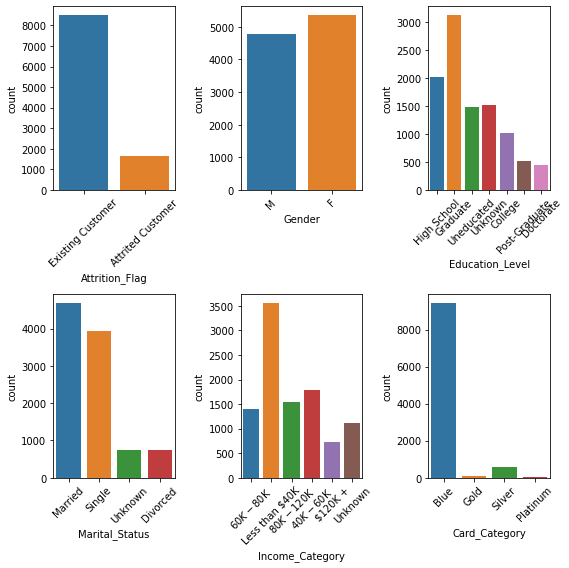

In [ ]:
def object_countplot(data, nrow, ncol):
    lists = data.columns
    object_list = []
    for list in lists:
        if (data[list].dtypes == 'O'):
            object_list.append(list)

    plt.figure(figsize=(8,8))

    for list,i in zip(object_list, np.arange(len(object_list))):
        plt.subplot(nrow, ncol, i+1)
        sns.countplot(data[list])
        plt.xticks(rotation=45)
        plt.ylabel("count")
        plt.xlabel(list)
        
    plt.tight_layout()
    plt.show()

object_countplot(data, 2, 3)

## 상관성 

In [ ]:
cor = data.corr()
cor

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Customer_Age,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808
Total_Amt_Chng_Q4_Q1,-0.062042,-0.035439,-0.048959,0.050119,-0.032247,-0.024445,0.012813,0.058174,0.007595,1.000000,0.039678,0.005469,0.384189,0.035235


## 히트맵으로 상관성 시각화

<AxesSubplot:>

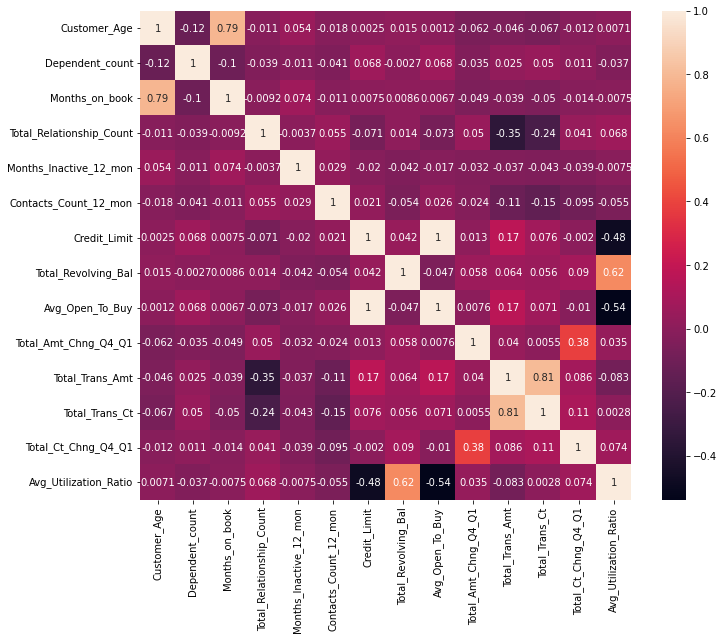

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(cor, annot=True)


## 상관성 알아보기 

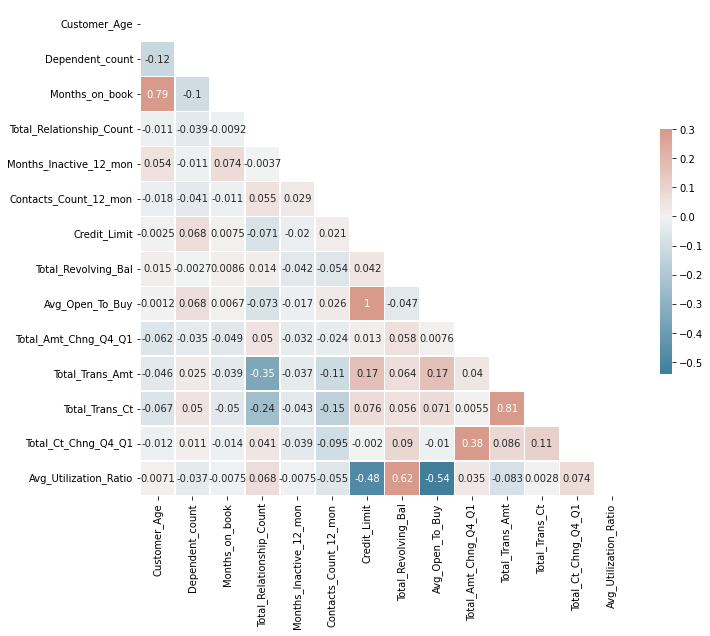

In [ ]:
# Generate a mask for the upper triangle

mask = np.triu(np.ones_like(cor))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.yticks(rotation=0)
plt.show()

## 연속형 데이터 이상치 알아보기(박스플롯)

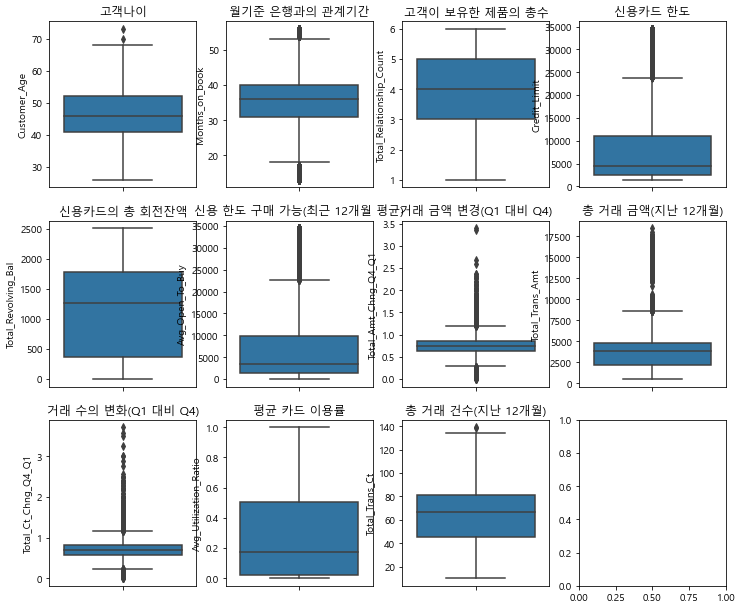

In [ ]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


fig , axes = plt.subplots(nrows=3 ,ncols=4,
                          figsize=(10,8) )
plt.subplots_adjust(left=0.05, bottom=0.01, right=0.99, 
                    top=0.99, wspace=None, hspace=0.2)
ax = axes.flatten()

sns.boxplot(y=data['Customer_Age'], data=data , ax = ax[0]) # 고객나이
ax[0].set_title('고객나이')

sns.boxplot(y=data['Months_on_book'], data=data , ax = ax[1]) # 월기준 은행과의 관계기간
ax[1].set_title('월기준 은행과의 관계기간')

sns.boxplot(y=data['Total_Relationship_Count'], data=data , ax = ax[2]) #  고객이 보유한 제품의 총수
ax[2].set_title('고객이 보유한 제품의 총수')

sns.boxplot(y=data['Credit_Limit'], data=data , ax = ax[3]) #신용카드 한도
ax[3].set_title('신용카드 한도')

sns.boxplot(y=data['Total_Revolving_Bal'], data=data , ax = ax[4]) # 신용카드의 총 회전잔액
ax[4].set_title('신용카드의 총 회전잔액')

sns.boxplot(y=data['Avg_Open_To_Buy'], data=data , ax = ax[5]) # 신용 한도 구매 가능(최근 12개월 평균)
ax[5].set_title('신용 한도 구매 가능(최근 12개월 평균)')

sns.boxplot(y=data['Total_Amt_Chng_Q4_Q1'], data=data , ax = ax[6]) #거래 금액 변경(Q1 대비 Q4)
ax[6].set_title('거래 금액 변경(Q1 대비 Q4)')

sns.boxplot(y=data['Total_Trans_Amt'], data=data , ax = ax[7]) # 총 거래 금액(지난 12개월)
ax[7].set_title('총 거래 금액(지난 12개월)')

sns.boxplot(y=data['Total_Ct_Chng_Q4_Q1'], data=data , ax = ax[8]) # 거래 수의 변화(Q1 대비 Q4)
ax[8].set_title('거래 수의 변화(Q1 대비 Q4)')

sns.boxplot(y=data['Avg_Utilization_Ratio'], data=data , ax = ax[9]) #평균 카드 이용률
ax[9].set_title('평균 카드 이용률')

sns.boxplot(y=data['Total_Trans_Ct'], data=data , ax = ax[10]) # 총 거래 건수(지난 12개월)
ax[10].set_title('총 거래 건수(지난 12개월)')

plt.show()


(0.0, 150.0)

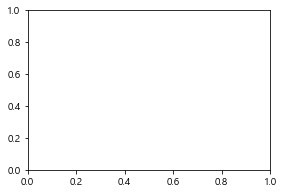

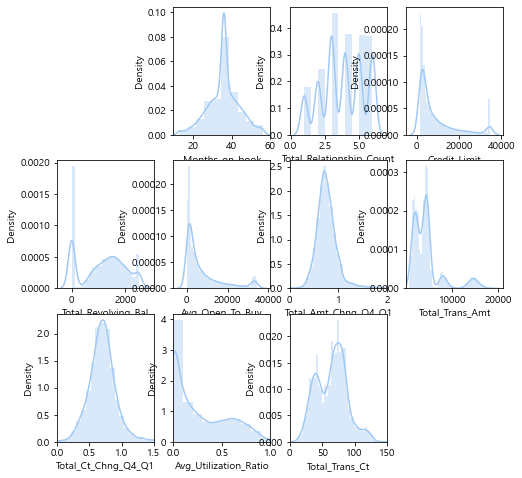

In [ ]:
import matplotlib.colors as mcl
from matplotlib.colors import LinearSegmentedColormap
plt.figure(figsize=(20,10))

plt.subplot(3,4,1)
sns.set_palette("pastel")
mu, sigma = 5, 1
x = mu + sigma * np.random.randn(1000)
 
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 배경색 설정
 
_, bins, patches = plt.hist(x, 20) ## 히스토그램
 
 
bin_centers = 0.5*(bins[:-1]+bins[1:]) ## 막대의 위치에 따라서 색 그라디언트를 입힌다.
 
## 막대의 위치를 0~1로 만들어준다.
col = bin_centers - min(bin_centers) 
col /= max(col) 
 
## hsv 색상을 선택한다.
h = 31
v = 97
## hsv 색상을 rgb 색상으로 바꿔준다.
cv = [mcl.hsv_to_rgb((h*1/(2*180),0.2,v/100)),
      mcl.hsv_to_rgb((h*1/(2*180),1,v/100)),
      mcl.hsv_to_rgb((h*1/(2*180),0.2,v/100))]
 
cmap=LinearSegmentedColormap.from_list('field_cmap', cv, N=256,gamma=1)
 
for c, p in zip(col, patches):
    plt.setp(p, "facecolor", cmap(c))
 
sns.distplot(data['Customer_Age'],bins=60)
plt.xlim(10,80)
# plt.title('고객나이')

plt.subplot(3,4,2)
sns.set_palette("pastel")
sns.distplot(data['Months_on_book'],bins=10)
plt.xlim(10,60)
# plt.title('월기준 은행과의 관계기간')

plt.subplot(3,4,3)
sns.set_palette("pastel")
sns.distplot(data['Total_Relationship_Count'],bins=10)
plt.xlim()
# plt.title('고객이 보유한 제품의 총수')

plt.subplot(3,4,4)
sns.set_palette("pastel")
sns.distplot(data['Credit_Limit'])
plt.xlim()
# plt.title('신용카드 한도')

plt.subplot(3,4,5)
sns.set_palette("pastel")
sns.distplot(data['Total_Revolving_Bal'])
plt.xlim()
# plt.title('신용카드의 총 회전잔액')

plt.subplot(3,4,6)
sns.set_palette("pastel")
sns.distplot(data['Avg_Open_To_Buy'])
plt.xlim()
# plt.title('신용 한도 구매 가능(최근 12개월 평균')

plt.subplot(3,4,7)
sns.set_palette("pastel")
sns.distplot(data['Total_Amt_Chng_Q4_Q1'])
plt.xlim(0,2.0)
# plt.title('총 거래 금액(지난 12개월)')

plt.subplot(3,4,8)
sns.set_palette("pastel")
sns.distplot(data['Total_Trans_Amt'])
plt.xlim(2.5)
# plt.title('총 거래 금액(지난 12개월)')

plt.subplot(3,4,9)
sns.set_palette("pastel")
sns.distplot(data['Total_Ct_Chng_Q4_Q1'])
plt.xlim(0,1.5)
# plt.title('거래 수의 변화(Q1 대비 Q4)')

plt.subplot(3,4,10)
sns.set_palette("pastel")
sns.distplot(data['Avg_Utilization_Ratio'],bins=10)
plt.xlim(0,1)
# plt.title('평균 카드 이용률')

plt.subplot(3,4,11)
sns.set_palette("pastel")
sns.distplot(data['Total_Trans_Ct'])
plt.xlim(0,150)
# plt.title(' 총 거래 건수(지난 12개월)')

1. Attrition_Flag 계정이 폐쇄된 경우, 아닌경우
2. Gender  성별
3. Education_Level  교육 수준 (고등학교, 대졸 )
4. Marital_Status  결혼 상태(기혼,미혼,이혼,불명)
5. Income_Category  소득 범주 (범위)
6. Card_Category  카드 유형(블루, 실버, 골드, 플래티넘)
7. Months_Inactive_12_mon  지난 12개월 동안 비활성 개월 수
8. Contacts_Count_12_mon  지난 12개월 동안의 연락처 수
9. Dependent_count  부양가족 수
10. Total_Relationship_Count  고객이 보유한 제품의 총수



In [ ]:
data['Total_Relationship_Count'].value_counts()


3    2305
4    1912
5    1891
6    1866
2    1243
1     910
Name: Total_Relationship_Count, dtype: int64

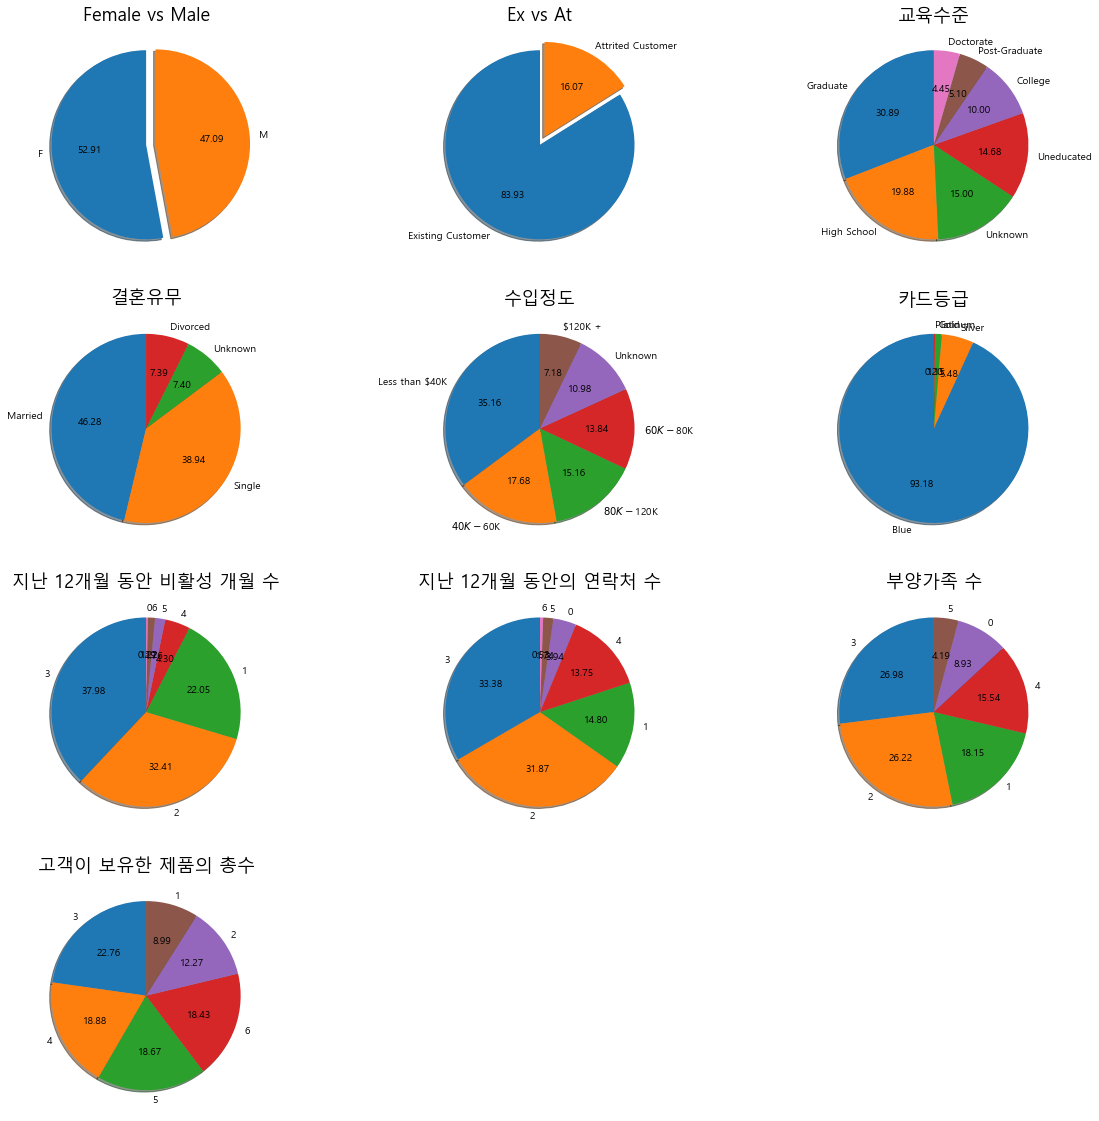

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(4,3,1)
labels = 'F', 'M'
labels
plt.pie(data['Gender'].value_counts(), explode=(0, 0.1), labels=labels, startangle=90, shadow=True, autopct='%.2f')
plt.title('Female vs Male', fontsize=18)


plt.subplot(4,3,2)
labels = 'Existing Customer', 'Attrited Customer'
labels
plt.pie(data['Attrition_Flag'].value_counts(), explode=(0, 0.1), labels=labels, startangle=90, shadow=True, autopct='%.2f')
plt.title('Ex vs At', fontsize=18)

plt.subplot(4,3,3)
labels = 'Graduate', 'High School','Unknown','Uneducated','College','Post-Graduate','Doctorate'
labels
plt.pie(data['Education_Level'].value_counts(), labels=labels, startangle=90, shadow=True, autopct='%.2f')
plt.title('교육수준', fontsize=18)


plt.subplot(4,3,4)

labels = 'Married', 'Single','Unknown','Divorced'
labels
plt.pie(data['Marital_Status'].value_counts(), labels=labels, startangle=90, shadow=True, autopct='%.2f')
plt.title('결혼유무', fontsize=18)

plt.subplot(4,3,5)

labels = 'Less than $40K', '$40K - $60K','$80K - $120K','$60K - $80K','Unknown','$120K +'
labels
plt.pie(data['Income_Category'].value_counts(), labels=labels, startangle=90, shadow=True, autopct='%.2f')
plt.title('수입정도', fontsize=18)

plt.subplot(4,3,6)
labels = 'Blue', 'Silver','Gold','Platinum' 
labels
plt.pie(data['Card_Category'].value_counts(), labels=labels, startangle=90, shadow=True, autopct='%.2f')
plt.title('카드등급', fontsize=18)

plt.subplot(4,3,7)
labels = '3','2','1','4','5','6','0'
labels
plt.pie(data['Months_Inactive_12_mon'].value_counts(), labels=labels, startangle=90, shadow=True, autopct='%.2f')
plt.title('지난 12개월 동안 비활성 개월 수', fontsize=18)

plt.subplot(4,3,8)
labels = '3','2','1','4','0','5','6'
labels
plt.pie(data['Contacts_Count_12_mon'].value_counts(), labels=labels, startangle=90, shadow=True, autopct='%.2f')
plt.title('지난 12개월 동안의 연락횟수', fontsize=18)

plt.subplot(4,3,9)
labels = '3','2','1','4','0','5'
labels
plt.pie(data['Dependent_count'].value_counts(), labels=labels, startangle=90, shadow=True, autopct='%.2f')
plt.title('부양가족 수', fontsize=18)

plt.subplot(4,3,10)
labels = '3','4','5','6','2','1'
labels
plt.pie(data['Total_Relationship_Count'].value_counts(), labels=labels, startangle=90, shadow=True, autopct='%.2f')
plt.title('고객이 보유한 제품의 총수', fontsize=18)

plt.show()

In [ ]:
data_mi=data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]
data_mi

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
create_report(data_mi)